In [12]:
#install.packages('randomForest')
library(readxl)
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('dplyr')
library(dplyr)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)
#install.packages('Metrics')
library(Metrics)
#install.packages('reprtree')
#devtools::install_github("MI2DataLab/randomForestExplainer")
#install.packages('randomForestExplainer')
library(randomForestExplainer)
#install.packages("scales")
library(scales)
#update.packages()
#install.packages("packagename")
require(foreign)
require(nnet)
require(ggplot2)
require(reshape2)

In [ ]:
# FA (weighted) Classifcation

,Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,...,popd,land,lita,lity,mori,rifr,cotw,moru,ppfg,prec
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,1,18353881130,37172386,...,56.93776,652860,43.01972,0.75933,62.5,1299.0269,NA,13.9,0.70,327
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,2,15147020535,2866376,...,104.61226,27400,98.14115,1.00582,9.5,9361.5460,59.95146,0.2,1.36,1485
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,1,101353230785,30809762,...,24.71305,1246700,0.00000,0.00000,77.7,4963.6533,43.98964,48.8,0.97,1010
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,2,12457941907,2951776,...,103.68022,28470,0.00000,0.00000,12.4,2329.1833,27.77778,0.2,0.77,562
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,3,47112941176,9939771,...,120.23432,82670,0.00000,0.00000,21.6,823.5207,24.48847,1.1,0.56,447
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,1,274039092455,161356039,...,1239.57931,130170,73.91220,1.03276,32.3,657.6039,14.19624,11.9,1.12,2666


n
<int>
73


[1] 1 2 1 2 3 1 1 3 1 1 4 1 1 2 3 1 1 1 4 2 1 1 1 3 1 1 4 1 4 1 2 1 4 2 3 3 1 1
[39] 1 1 4 1 1 2 2 1 1 3 1 3 1 1 1 1 2 4 1 1 3 1 3 3 1 3 1 2 3 1 2 3 4 1 1
Levels: 1 2 3 4

,Country,bicy,cart,mcyc,pcar,boat,clusters
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,1
2,Albania,26.4,3.2,9.6,37.0,0.7,2
3,Angola,4.6,1.3,17.8,10.9,0.4,1
4,Armenia,8.6,0.4,0.2,39.2,0.3,2
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,3
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,1


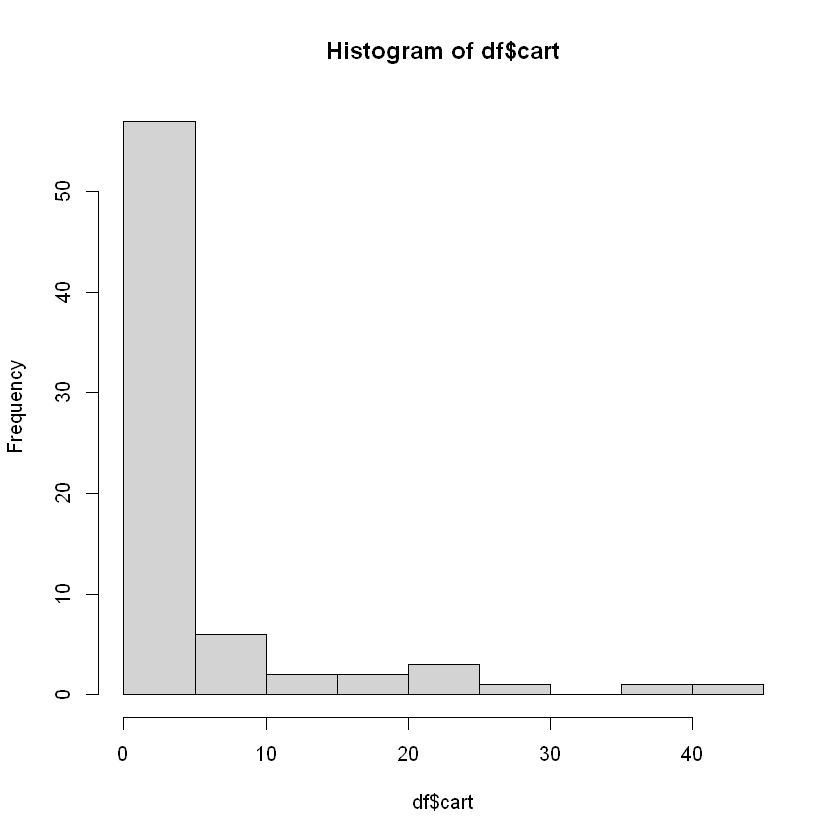

In [33]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.exp =read_excel("../../results/df-water-explore.xlsx" ,sheet=1)
df.cluster = read_excel("../../results/df-fa-five-cluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.exp$clusters <- as.factor(df.cluster$clusters)
df <- merge(x = df.exp,
              y = df.wb,
              by = c("Country"))

head(df)
count(df)
df <- df[, c(1:13, 17,21)]
# ReScaling in 0 to 1 for all the necessary data
#df.scale = as.data.frame(apply(as.matrix(df[, c(2:7, 9:15)]), 2, rescale))
#df <- cbind(df,df.scale)
#df <- df[,c(1,8,16:28)]
#head(df)

df.a <- df[, c(1:6,8)]
head(df.a)

hist(df$cart)

# Tree


Classification tree:
tree(formula = clusters ~ . - Country, data = df.a)
Number of terminal nodes:  10 
Residual mean deviance:  0.9255 = 58.3 / 63 
Misclassification error rate: 0.1781 = 13 / 73 

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 73 171.400 1 ( 0.54795 0.15068 0.19178 0.10959 )  
   2) pcar < 12.4 49  68.590 1 ( 0.79592 0.04082 0.12245 0.04082 )  
     4) boat < 0.95 42  37.390 1 ( 0.88095 0.04762 0.07143 0.00000 )  
       8) pcar < 4.6 20   0.000 1 ( 1.00000 0.00000 0.00000 0.00000 ) *
       9) pcar > 4.6 22  30.310 1 ( 0.77273 0.09091 0.13636 0.00000 )  
        18) cart < 2.45 10  17.960 1 ( 0.60000 0.10000 0.30000 0.00000 )  
          36) bicy < 12.15 5   0.000 1 ( 1.00000 0.00000 0.00000 0.00000 ) *
          37) bicy > 12.15 5   9.503 3 ( 0.20000 0.20000 0.60000 0.00000 ) *
        19) cart > 2.45 12   6.884 1 ( 0.91667 0.08333 0.00000 0.00000 )  
          38) bicy < 23.3 5   5.004 1 ( 0.80000 0.20000 0.00000 0.00000 ) *
          39) bicy > 23.3 7   0.000 1 ( 1.00000 0.00000 0.00000 0.00000 ) *
     5) boat > 0.95 7  15.110 3 ( 0.28571 0.00000 0.42857 0.28571 ) *
   3) pcar > 12.4 24  58.220 2 ( 0.04167 0.37500 0.33333 0

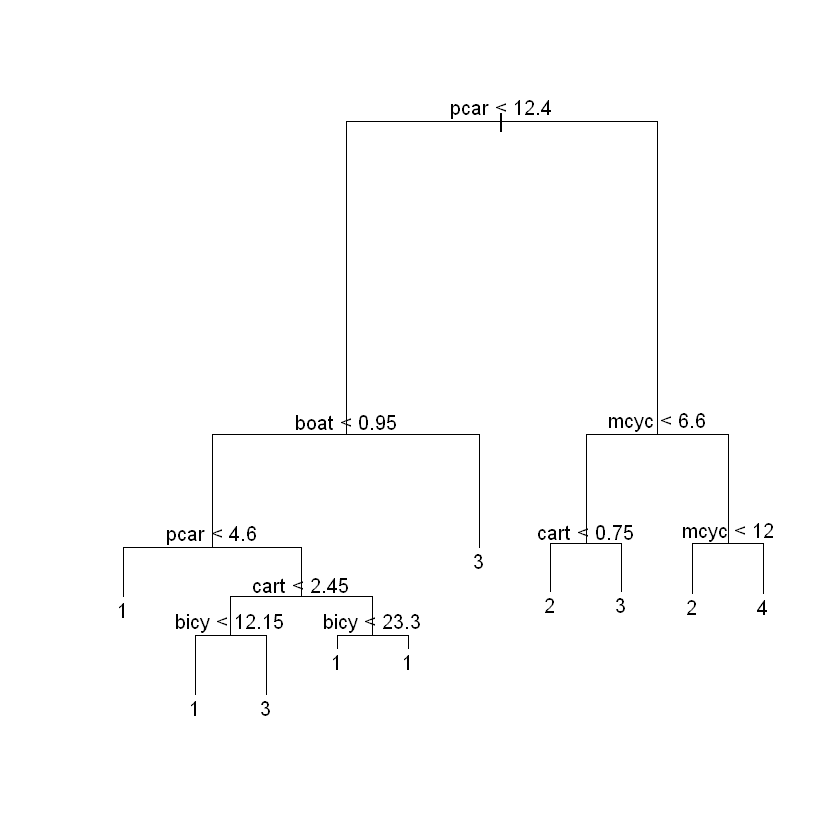

In [7]:
tree.wa = tree(clusters ~ . - Country  , data = df.a)
summary(tree.wa) 
plot(tree.wa)
text(tree.wa, pretty = 0) #population density High density for six cluster group.
tree.wa

# Random Forest


Call:
 randomForest(formula = clusters ~ . - Country, data = df, ntree = 200,      mtry = 13) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 13

        OOB estimate of  error rate: 35.62%
Confusion matrix:
   1 2 3 4 class.error
1 35 1 4 0   0.1250000
2  2 7 1 1   0.3636364
3  6 3 4 1   0.7142857
4  2 2 3 1   0.8750000


                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted         73   factor numeric  
err.rate        1000   -none- numeric  
confusion         20   -none- numeric  
votes            292   matrix numeric  
oob.times         73   -none- numeric  
classes            4   -none- character
importance        13   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                 73   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

,MeanDecreaseGini
bicy,0.9080382
cart,1.2957744
mcyc,4.8419659
pcar,14.8456180
boat,4.2275348
wigc,1.3228108
cgdp,1.5869645
tpop,1.4498247
upop,3.6252754
popd,4.3795501


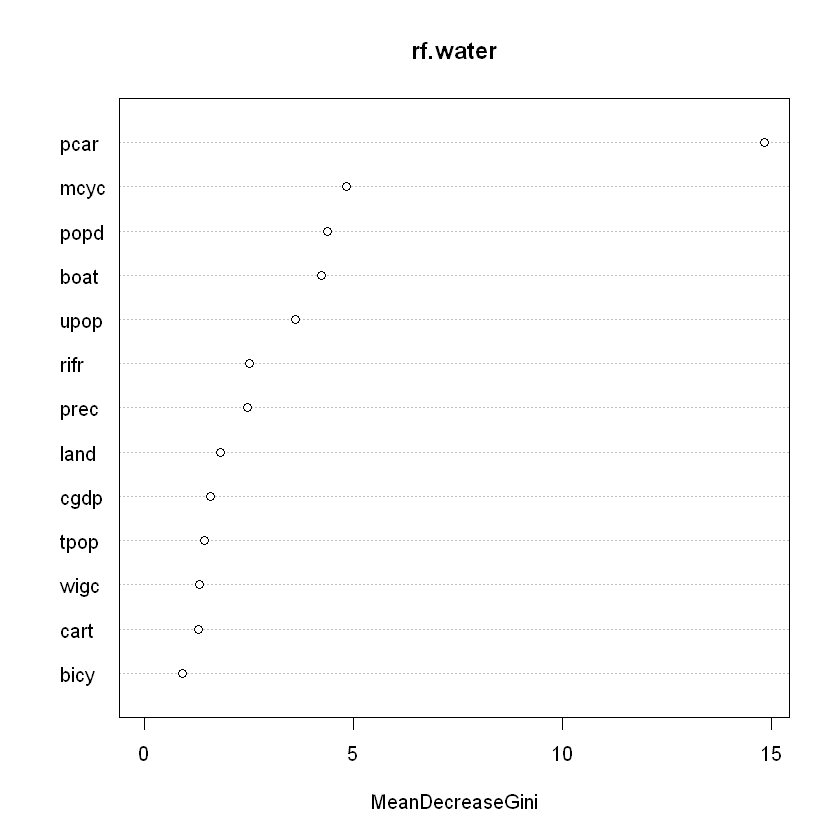

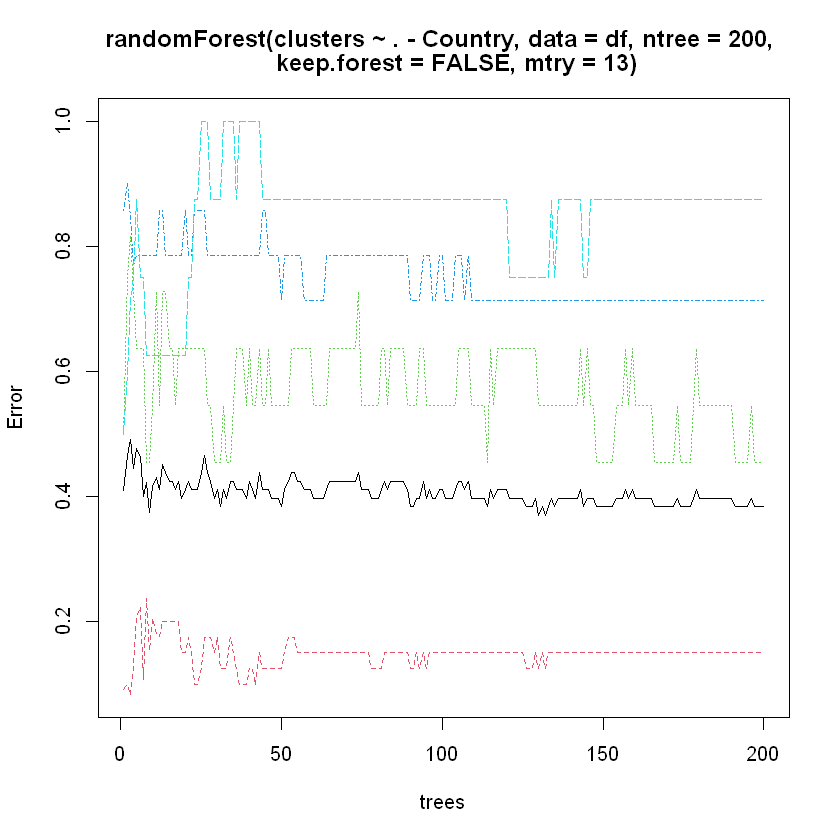

In [5]:
rf.water = randomForest(clusters~. -Country, data = df , ntree= 200,mtry=13)
print(rf.water)

summary(rf.water)

importance <- importance(rf.water, sort = TRUE)
importance

# create an importance plot
varImpPlot(rf.water, sort=TRUE, n.var=min(30, nrow(rf.water$importance)),
           type=NULL, class=NULL, scale=TRUE )
#plot
plot(randomForest(clusters~. -Country, data = df ,ntree=200,  keep.forest=FALSE, mtry=13) )

The MeanDecreaseGini measures the Gini importance = how important the features are over all splits done in the tree/forest - whereas for each individual split the Gini importance indicates how much the Gini criterion = "unequality/heterogeneity" was reduced using this split.
mori, upop, pcar popd, mcyc important and contributed most to obtaining such splits, so they are considered more important.

# MULTINOMIAL LOGISTIC REGRESSION

In [36]:
head(df)

# Fit the model
model <- nnet::multinom(clusters ~. -Country , data = df)
# Summarize the model
summary(model)

#z values
z <- summary(model)$coefficients/summary(model)$standard.errors
z
# 2-tailed z test
p <- (1 - pnorm(abs(z), 0, 1)) * 2
p

## extract the coefficients from the model and exponentiate
exp(coef(model))

# Make predictions
predicted.classes <- model %>% predict(df)
head(predicted.classes)

head(pp <- fitted(model))

# Model accuracy
mean(predicted.classes == df$clusters)

,Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,upop,popd,land,rifr,prec
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,1,18353881130,37172386,25.495,56.93776,652860,1299.0269,327
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,2,15147020535,2866376,60.319,104.61226,27400,9361.5460,1485
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,1,101353230785,30809762,65.514,24.71305,1246700,4963.6533,1010
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,2,12457941907,2951776,63.149,103.68022,28470,2329.1833,562
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,3,47112941176,9939771,55.680,120.23432,82670,823.5207,447
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,1,274039092455,161356039,36.632,1239.57931,130170,657.6039,2666


# weights:  60 (42 variable)
initial  value 101.199488 
iter  10 value 69.669802
iter  20 value 63.042352
iter  30 value 61.422295
iter  40 value 59.545925
iter  50 value 58.969923
iter  60 value 58.532982
iter  70 value 58.411535
iter  80 value 58.157931
iter  90 value 58.093090
iter 100 value 58.079081
final  value 58.079081 
stopped after 100 iterations


Call:
nnet::multinom(formula = clusters ~ . - Country, data = df)

Coefficients:
    (Intercept)          bicy          cart          mcyc          pcar
2  8.444210e-07  3.708219e-05 -1.537247e-05 -5.775042e-05  1.072697e-04
3  1.784276e-06  5.423777e-05  4.249791e-05 -1.635789e-05  8.273921e-05
4 -2.970999e-06 -1.484816e-05 -1.129823e-05  1.103323e-04 -5.488714e-05
           boat          wigc         cgdp          tpop          upop
2 -2.044280e-06 -7.645875e-07 7.563374e-11 -1.673582e-07  1.626340e-04
3  6.470531e-06  1.113563e-07 6.325461e-11 -1.369998e-07  3.504701e-05
4  2.974525e-06 -3.722453e-07 7.405028e-11 -1.405979e-07 -1.758034e-04
           popd          land         rifr          prec
2 -0.0002947228 -1.727088e-06 9.476682e-06 -0.0009000602
3 -0.0001065837 -7.162959e-07 9.810960e-06 -0.0006732697
4  0.0007517460 -4.529365e-06 2.155174e-05 -0.0009147203

Std. Errors:
   (Intercept)         bicy         cart         mcyc         pcar         boat
2 4.162097e-24 9.787736e-

,(Intercept),bicy,cart,mcyc,pcar,boat,wigc,cgdp,tpop,upop,popd,land,rifr,prec
2,2.028835e+17,3.788638e+17,-2.351902e+18,-3.809130e+17,1.385748e+18,-6.940943e+17,-1.177916e+18,31.37698,-311507633,6.425066e+17,-5.158591e+17,-4.337227e+11,1.358125e+14,-1.413720e+17
3,1.234374e+17,1.545198e+17,1.098215e+18,-5.383706e+16,4.101008e+17,5.276464e+17,5.149747e+16,19.92453,-149730379,4.298861e+16,-6.362184e+16,-6.718585e+10,5.758922e+13,-3.555068e+16
4,-6.741575e+17,-1.701547e+17,-2.029007e+18,5.999859e+17,-5.272176e+17,4.470718e+17,-1.202189e+18,38.55022,-74579592,-5.587093e+17,1.782008e+18,-2.496318e+12,4.528252e+14,-1.020919e+17


,(Intercept),bicy,cart,mcyc,pcar,boat,wigc,cgdp,tpop,upop,popd,land,rifr,prec
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,(Intercept),bicy,cart,mcyc,pcar,boat,wigc,cgdp,tpop,upop,popd,land,rifr,prec
2,1.000001,1.0000371,0.9999846,0.9999423,1.0001073,0.999998,0.9999992,1,0.9999998,1.0001626,0.9997053,0.9999983,1.000009,0.9991003
3,1.000002,1.0000542,1.0000425,0.9999836,1.0000827,1.000006,1.0000001,1,0.9999999,1.0000350,0.9998934,0.9999993,1.000010,0.9993270
4,0.999997,0.9999852,0.9999887,1.0001103,0.9999451,1.000003,0.9999996,1,0.9999999,0.9998242,1.0007520,0.9999955,1.000022,0.9990857


[1] 1 1 3 3 4 1
Levels: 1 2 3 4

,1,2,3,4
1,0.98741971,1.896920e-03,0.009830605,0.0008527662
2,0.35379810,1.854467e-01,0.245183951,0.2155712365
3,0.27854721,1.685996e-01,0.542391487,0.0104617451
4,0.25730250,2.327065e-01,0.257972483,0.2520185643
5,0.08060539,3.073665e-01,0.283486615,0.3285415265
6,0.98761582,9.449307e-05,0.001119134,0.0111705552


[1] 0.6712329